# Learning about Spill Point algorithm

<!-- SUMMARY: Calculate the Spill Point on a Surface -->

<!-- CATEGORY: Data_Base_Management -->

This Tutorial is meant to give some hints about using Spill Point method in gstlearn

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

Setting some global variables

In [2]:
# Define the Space Dimension
ndim = 2
gl.defineDefaultSpace(gl.ESpaceType.RN, ndim)

# Set the Seed for the Random Number generator
gl.law_set_random_seed(32131)

Generating an initial square grid covering a 1.5 by 1 surface (100 meshes along each direction)

In [3]:
#grid = gl.DbGrid.create([150,100], [0.01,0.01])
grid = gl.DbGrid.create([50,20], [0.05,0.05])
uid = grid.addColumnsByConstant(valinit=0., radix="Data")

Creating a Data Set. The set is generated using a non-conditional geostatistical simulation (performed using the Turning Bands method). This simulation is first performed on the grid which is then sampled to constitute the Point Data Set.

In [4]:
model = gl.Model.createFromParam(gl.ECov.CUBIC, range=0.3)
err = gl.simtub(None, grid, model, namconv=gl.NamingConvention("Topo",False, False))

Add some constraining information

In [5]:
print("Data INSIDE Reservoir")
coorYES = np.array([[1.7, 0.8], [1.35, 0.65]])
for i in range(coorYES.shape[0]):
    grid.setValue("Data",grid.coordinateToRank(coorYES[i]),2)
    print("- Coordinates =", coorYES[i], "- Indices =", grid.coordinateToIndices(coorYES[i]))

print("Data OUTSIDE Reservoir")
#coorNO = np.array([])
coorNO = np.array([[0.5, 0.2]])
for i in range(coorNO.shape[0]):
    grid.setValue("Data",grid.coordinateToRank(coorNO[i]),1)
    print("- Coordinates =", coorNO[i], "- Indices =", grid.coordinateToIndices(coorNO[i]))

Data INSIDE Reservoir
- Coordinates = [1.7 0.8] - Indices = [34 16]
- Coordinates = [1.35 0.65] - Indices = [27 13]
Data OUTSIDE Reservoir
- Coordinates = [0.5 0.2] - Indices = [10  4]


We display the contents of the simulated variable which will serve as Topography, as well as the constraining information

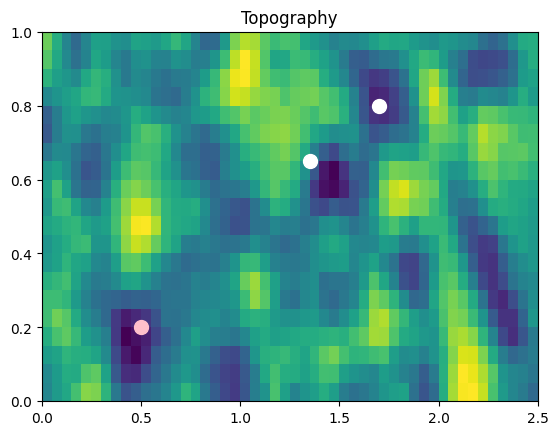

In [6]:
gp.plot(grid, "Topo")
if len(coorYES) > 0:
    gp.sample(coorYES.transpose(),color='white')
if len(coorNO) > 0:
    gp.sample(coorNO.transpose(),color='pink')
gp.decoration(title="Topography")

Launch the Spill Point algorithm

In [7]:
res = gl.spillPoint(grid, "Topo", "Data", option=1, flag_up=True, verbose_step=2)
spill = grid.indicesToCoordinate([res.ix0, res.iy0])


Spill Point environment
-----------------------
- Grid dimensions = 50 x 20
- No Maximum reservoir thickness
- 8 - connectivity
An edge of 2 pixels is added to the original grid.

Constraints
......................................................
......................................................
..                                                  ..
..                                                  ..
..                                                  ..
..                                  *               ..
..                                                  ..
..                                                  ..
..                           *                      ..
..                                                  ..
..                                                  ..
..                                                  ..
..                                                  ..
..                                                  ..
..                                   

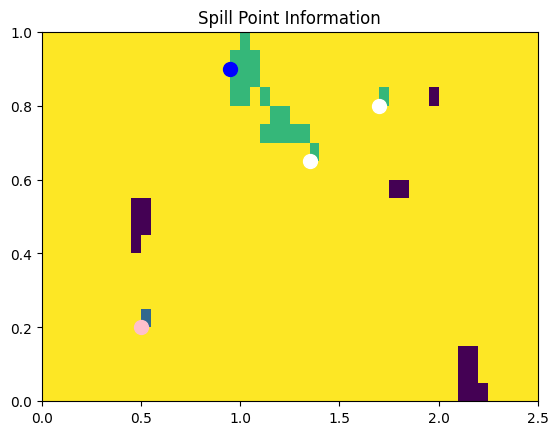

In [8]:
gp.raster(grid, "Spill")
if len(coorYES) > 0:
    gp.sample(coorYES.transpose(),color='white')
if len(coorNO) > 0:
    gp.sample(coorNO.transpose(),color='pink')
gp.sample(spill, color="blue")
gp.decoration(title="Spill Point Information")

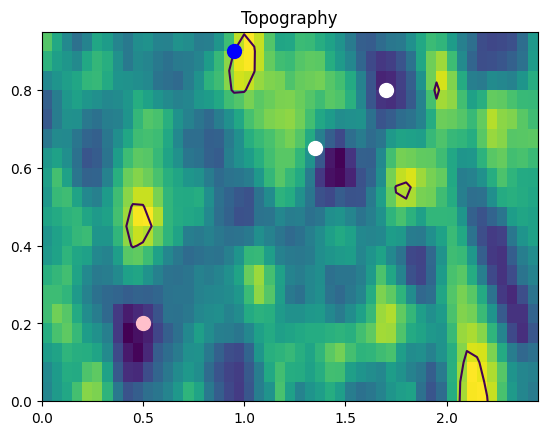

In [9]:
gp.raster(grid,name="Topo")
gp.isoline(grid,name="Topo", levels=[res.h])
if len(coorYES) > 0:
    gp.sample(coorYES.transpose(),color='white')
if len(coorNO) > 0:
    gp.sample(coorNO.transpose(),color='pink')
gp.sample(spill, color="blue")
gp.decoration(title="Topography")

In [ ]:
dbfmt = gl.DbStringFormat.createFromFlags(flag_resume=False, flag_stats=True, flag_vars=False, 
                                          flag_extend=False, names=["Topo","Spill"])
grid.display(dbfmt)